#Task 4
#Sales Prediction using Python.
Sales prediction is a common task in business analytics and machine learning.
To predict future sales, we can use a variety of techniques, but one popular approach is using a time series analysis. Time series analysis is used to analyze data points collected at regular intervals over time.
Here's an example of how you can predict sales using Python and the various machine learning model used to predict sales but we will use logistics regression on this prediction.

In [1]:
#Step no.1 - Upload Data
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [37]:
#Step no.2 - Import Libraries & Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import io
sales = pd.read_csv(io.BytesIO(uploaded['advertising.csv']))

In [38]:
sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
#Step no.3 - Data Preprocessing
sales.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [5]:
sales.head(12)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [6]:
sales.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [7]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
sales.shape

(200, 4)

<Axes: >

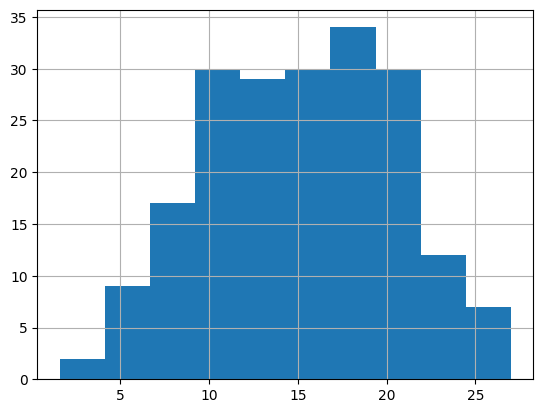

In [17]:
#Step no.4 - Data Visualization
sales["Sales"].hist()

<Axes: >

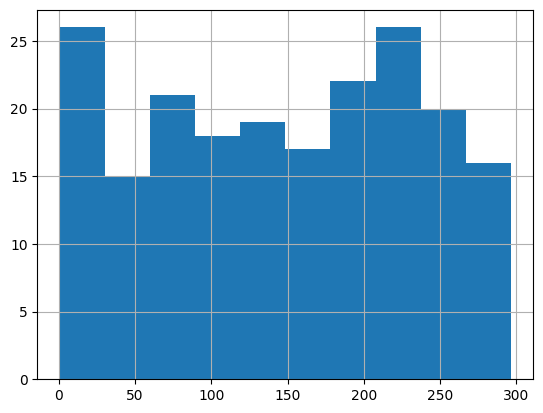

In [18]:
sales["TV"].hist()

<Axes: >

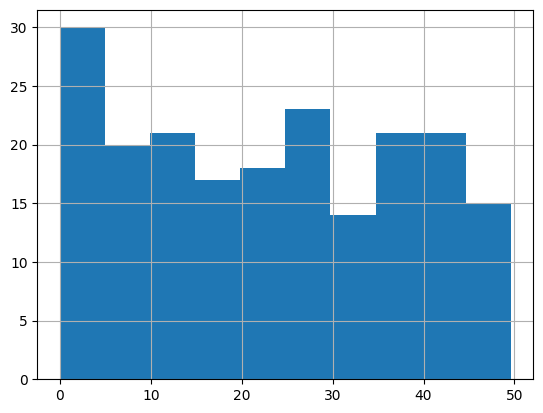

In [16]:
sales["Radio"].hist()

<Axes: >

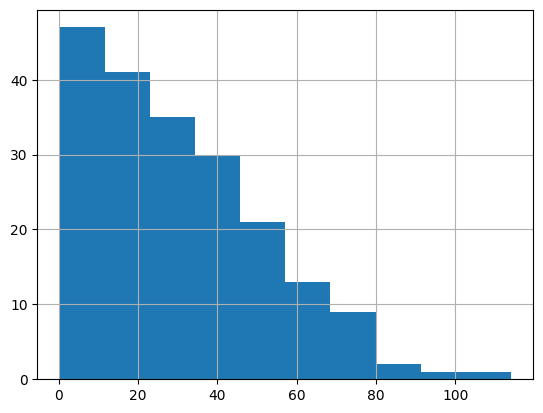

In [15]:
sales["Newspaper"].hist()

<Axes: >

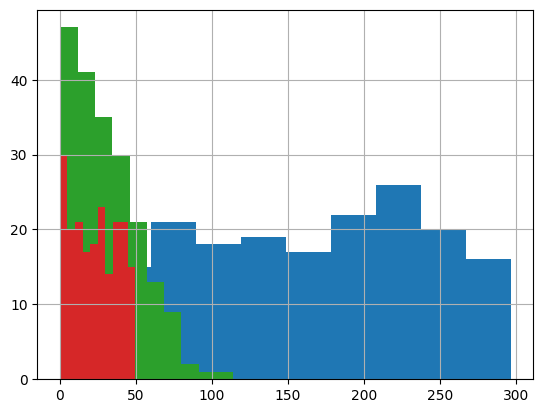

In [19]:
sales["TV"].hist()
sales["Sales"].hist()
sales["Newspaper"].hist()
sales["Radio"].hist()

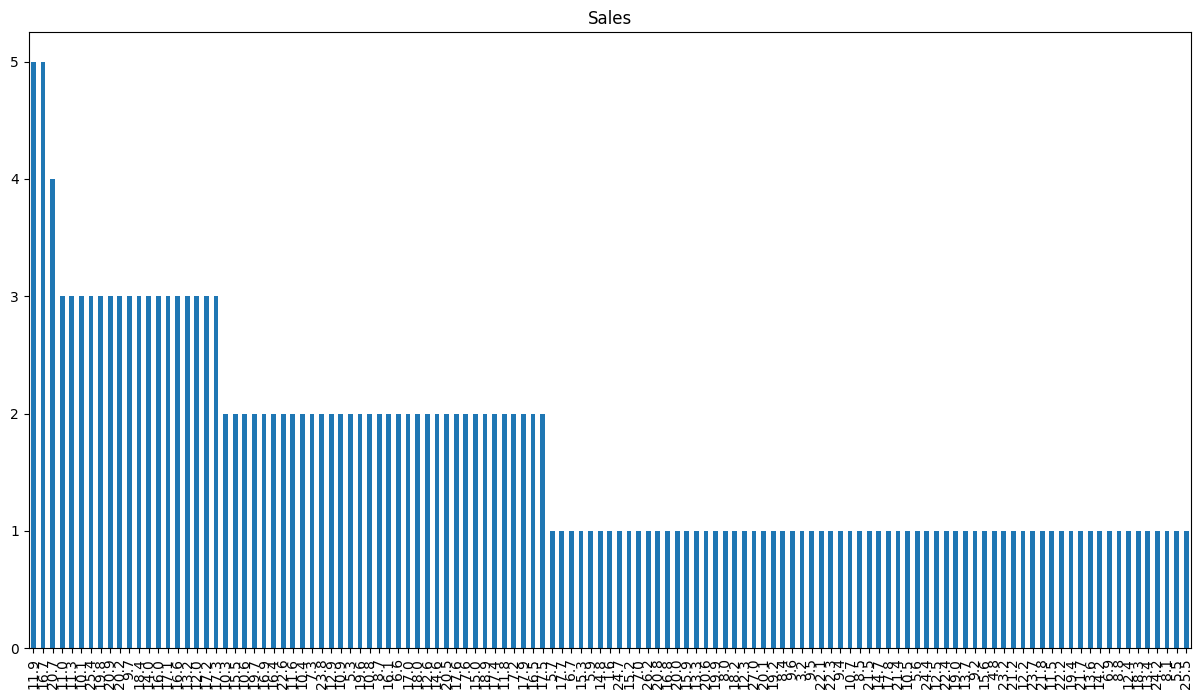

In [23]:
plt.figure(figsize=(15,8))
sales['Sales'].value_counts().plot(kind='bar')
plt.title('Sales')
plt.show()

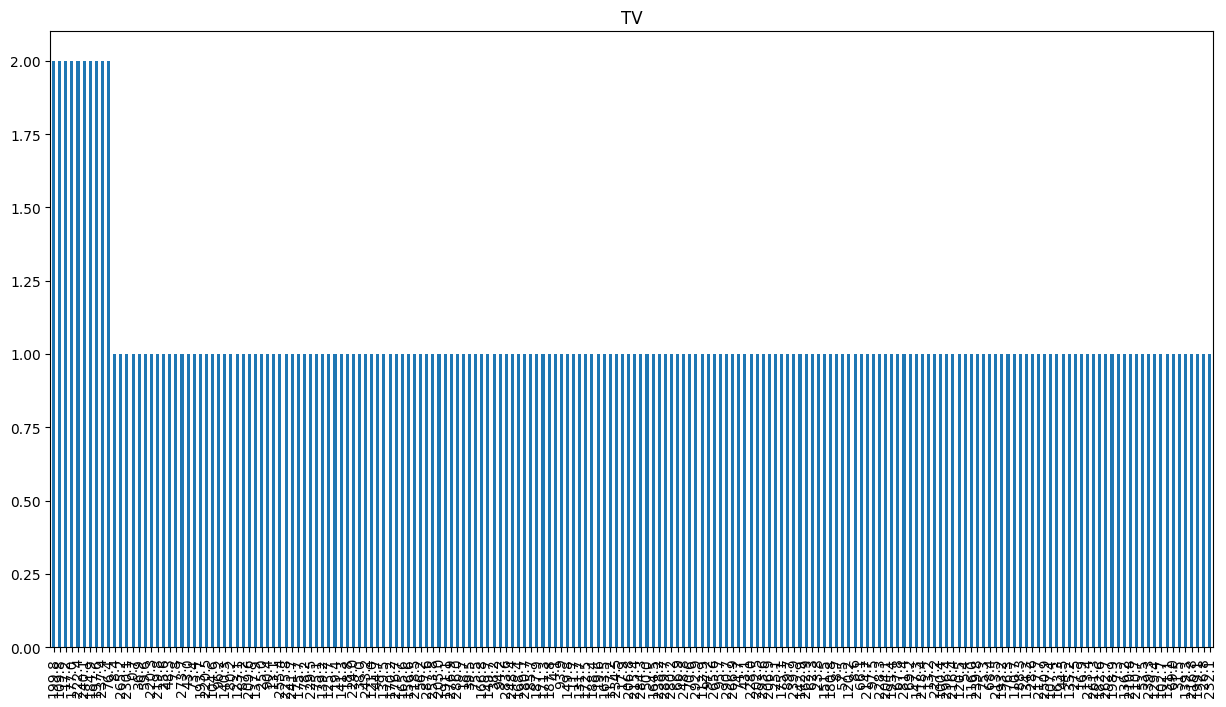

In [24]:
plt.figure(figsize=(15,8))
sales['TV'].value_counts().plot(kind='bar')
plt.title('TV')
plt.show()

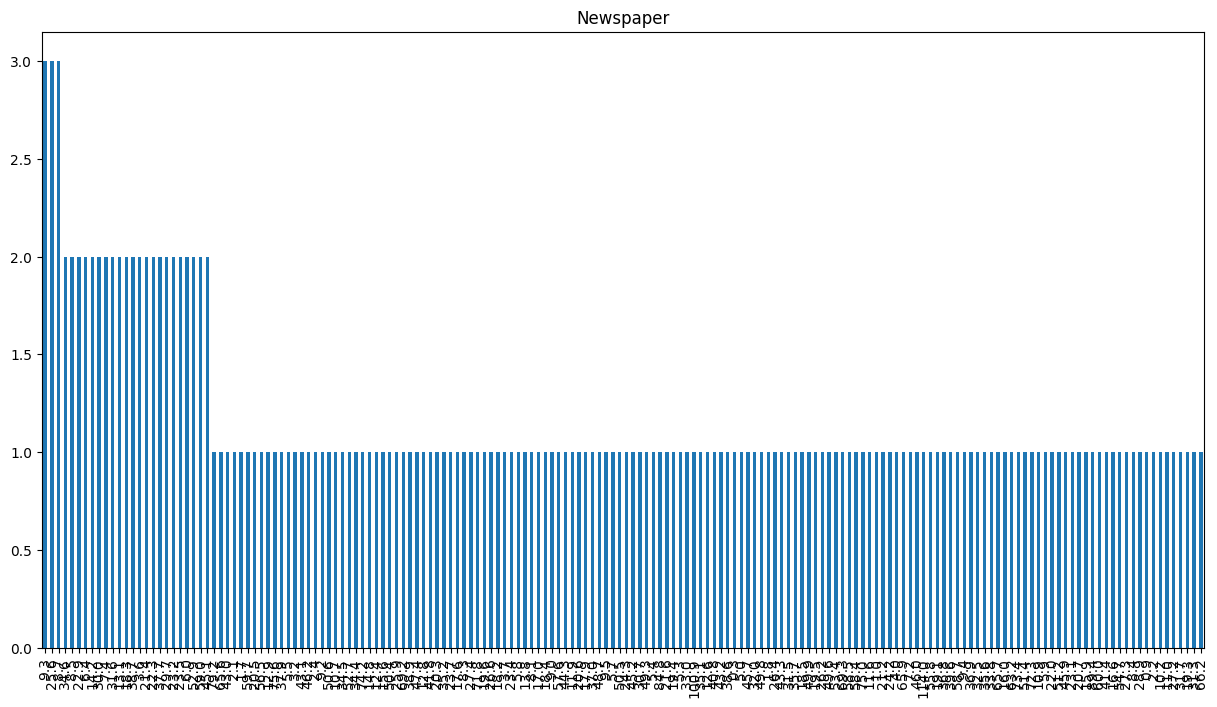

In [25]:
plt.figure(figsize=(15,8))
sales['Newspaper'].value_counts().plot(kind='bar')
plt.title('Newspaper')
plt.show()

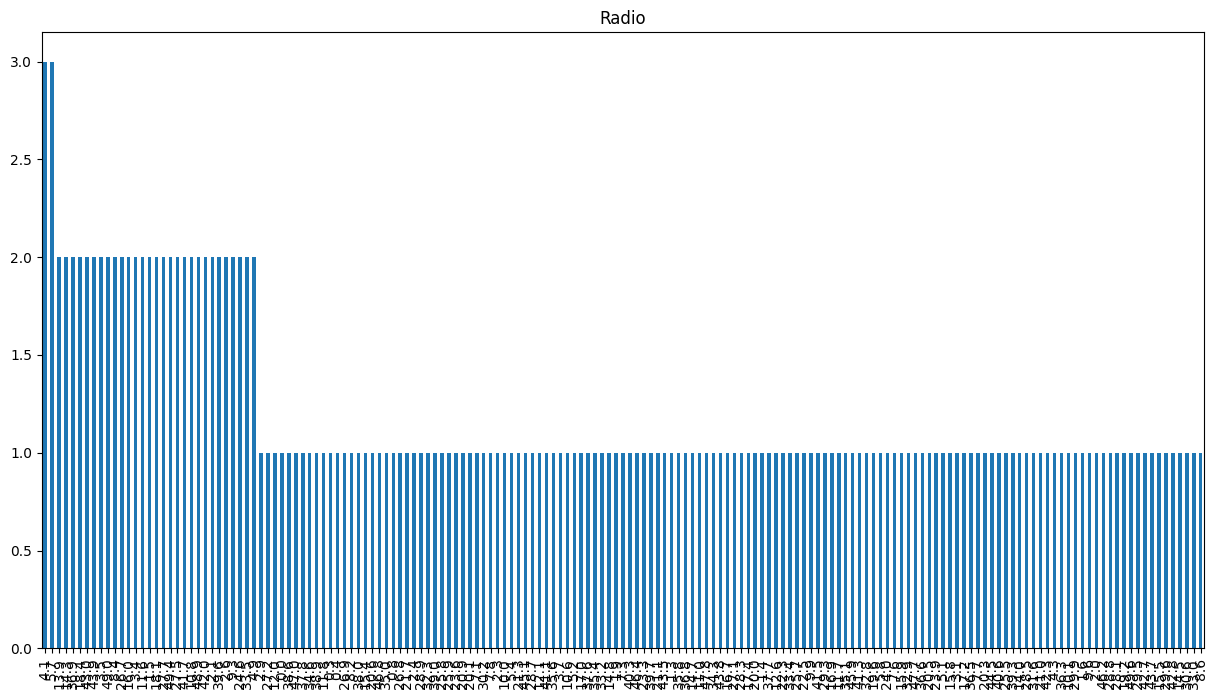

In [26]:
plt.figure(figsize=(15,8))
sales['Radio'].value_counts().plot(kind='bar')
plt.title('Radio')
plt.show()

In [31]:
#Step no.4 - Train and Test Split
X = sales.drop(['Sales'], axis=1)
y = sales['Sales']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print("Shape of X_train:" ,X_train.shape)
print("Shape of y_train:" ,y_train.shape)
print("Shape of X_test:" ,X_test.shape)
print("Shape of y_test:" ,y_test.shape)

Shape of X_train: (160, 3)
Shape of y_train: (160,)
Shape of X_test: (40, 3)
Shape of y_test: (40,)


In [40]:
#Step no.5 - Build and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [42]:
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [41]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 1.7052146229349223


In [44]:
print("Accuracy -->", model.score(X_test, y_test)*100)

Accuracy --> 90.59011844150827


That's it! This is a basic sales prediction of how we can perform sales prediction using Python and use linear regression model. Keep in mind that there are many other methods and models you can explore for sales prediction, depending on the specific characteristics of your data.